# Numerical Integration

**Learning Objectives:** Learn how to numerically integrate 1d and 2d functions that are represented as Python functions or numerical arrays of data using `scipy.integrate`.

This lesson was orginally developed by Jennifer Klay under the terms of the MIT license. The original version is in this repo (https://github.com/Computing4Physics/C4P). Her materials was in turn based on content from the [Computational Physics](http://www-personal.umich.edu/~mejn/cp/) book by Mark Newman at University of Michigan, materials developed by [Matt Moelter](http://physics.calpoly.edu/node/88) and [Jodi Christiansen](http://physics.calpoly.edu/node/70) for PHYS 202 at [Cal Poly](http://physics.calpoly.edu), as well as the [SciPy tutorials](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html).

## Imports

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Introduction

We often calculate integrals in physics (electromagnetism, thermodynamics, quantum mechanics, etc.).  In calculus, you learned how to evaluate integrals analytically.  Some functions are too difficult to integrate analytically and for these we need to use the computer to integrate numerically.  A numerical integral goes back to the basic principles of calculus.  Given a function $f(x)$, we need to find the area under the curve between two limits, $a$ and $b$:
    
$$
I(a,b) = \int_a^b f(x) dx
$$

There is no known way to calculate such an area exactly in all cases on a computer, but we can do it approximately by dividing up the area into rectangular slices and adding them all together.  Unfortunately, this is a poor approximation, since the rectangles under and overshoot the function:

<img src="rectangles.png" width=400>

---

## Trapezoidal Rule

A better approach, which involves very little extra work, is to divide the area into trapezoids rather than rectangles.  The area under the trapezoids is a considerably better approximation to the area under the curve, and this approach, though simple, often gives perfectly adequate results.

<img src="trapz.png" width=420>

We can improve the approximation by making the size of the trapezoids smaller.  Suppose we divide the interval from $a$ to $b$ into $N$ slices or steps, so that each slice has width $h = (b − a)/N$ . Then the right-hand side of the $k$ th slice falls at $a+kh$, and the left-hand side falls at $a+kh−h$ = $a+(k−1)h$ . Thus the area of the trapezoid for this slice is

$$
A_k = \tfrac{1}{2}h[ f(a+(k−1)h)+ f(a+kh) ]
$$

This is the *trapezoidal rule*. It gives us a trapezoidal approximation to the area under one slice of our function.

Now our approximation for the area under the whole curve is the sum of the areas of the trapezoids for all $N$ slices

$$
I(a,b) \simeq \sum\limits_{k=1}^N A_k = \tfrac{1}{2}h \sum\limits_{k=1}^N [ f(a+(k−1)h)+ f(a+kh) ] = h \left[ \tfrac{1}{2}f(a) + \tfrac{1}{2}f(b) + \sum\limits_{k=1}^{N-1} f(a+kh)\right]
$$

Note the structure of the formula: the quantity inside the square brackets is a sum over values of $f(x)$ measured at equally spaced points in the integration domain, and we take a half of the values at the start and end points but one times the value at all the interior points.

### Applying the Trapezoidal rule

Use the trapezoidal rule to calculate the integral of $x^4 − 2x + 1$ from $x$ = 0 to $x$ = 2.

This is an integral we can do by hand, so we can check our work.  To define the function, let's use a lambda expression (you learned about these in the advanced python section of CodeCademy).  It's basically just a way of defining a function of some variables in one line.  For this case, it is just a function of `x`:

In [4]:
func = lambda x: x**4 - 2*x + 1

In [5]:
N = 10
a = 0.0
b = 2.0
h = (b-a)/N

k = np.arange(1,N)
I = h*(0.5*func(a) + 0.5*func(b) + func(a+k*h).sum())

print(I)

4.50656


The correct answer is

$$
I(0,2) = \int_0^2 (x^4-2x+1)dx = \left[\tfrac{1}{5}x^5-x^2+x\right]_0^2 = 4.4
$$

So our result is off by about 2%.

## Simpson's Rule

The trapezoidal rule estimates the area under a curve by approximating the curve with straight-line segments.  We can often get a better result if we approximate the function instead with curves of some kind.  *Simpson's rule* uses quadratic curves.  In order to specify a quadratic completely one needs three points, not just two as with a straight line. So in this method we take a pair of adjacent slices and fit a quadratic through the three points that mark the boundaries of those slices.  

Given a function $f(x)$ and spacing between adjacent points $h$, if we fit a quadratic curve $ax^2 + bx + c$  through the points $x$ = $-h$, 0, $+h$, we get

$$
f(-h) = ah^2 - bh + c, \hspace{1cm} f(0) = c, \hspace{1cm} f(h) = ah^2 +bh +c
$$

Solving for $a$, $b$, and $c$ gives:

$$
a = \frac{1}{h^2}\left[\tfrac{1}{2}f(-h) - f(0) + \tfrac{1}{2}f(h)\right], \hspace{1cm} b = \frac{1}{2h}\left[f(h)-f(-h)\right], \hspace{1cm} c = f(0)
$$

and the area under the curve of $f(x)$ from $-h$ to $+h$ is given approximately by the area under the quadratic:
    
$$
I(-h,h) \simeq \int_{-h}^h (ax^2+bx+c)dx = \tfrac{2}{3}ah^3 + 2ch = \tfrac{1}{3}h[f(-h)+4f(0)+f(h)]
$$

This is Simpson’s rule. It gives us an approximation to the area under two adjacent slices of our function. Note that the final formula for the area involves only $h$ and the value of the function at evenly spaced points, just as with the trapezoidal rule. So to use Simpson’s rule we don’t actually have to worry about the details of fitting a quadratic—we just plug numbers into this formula and it gives us an answer. This makes Simpson’s rule almost as simple to use as the trapezoidal rule, and yet Simpson’s rule often gives much more accurate answers.

Applying Simpson’s rule involves dividing the domain of integration into many slices and using the rule to separately estimate the area under successive pairs of slices, then adding the estimates for all pairs to get the final answer.

If we are integrating from $x = a$ to $x = b$ in slices of width $h$ then Simpson’s rule gives the area under the $k$ th pair, approximately, as

$$
A_k = \tfrac{1}{3}h[f(a+(2k-2)h)+4f(a+(2k-1)h) + f(a+2kh)]
$$

With $N$ slices in total, there are $N/2$ pairs of slices, and the approximate value of the entire integral is given by the sum

$$
I(a,b) \simeq \sum\limits_{k=1}^{N/2}A_k = \tfrac{1}{3}h\left[f(a)+f(b)+4\sum\limits_{k=1}^{N/2}f(a+(2k-1)h)+2\sum\limits_{k=1}^{N/2-1}f(a+2kh)\right]
$$

Note that the total number of slices must be even for Simpson's rule to work.

### Applying Simpson's rule

Now let's code Simpson's rule to compute the integral of the same function from before,  $f(x) = x^4 - 2x + 1$ from 0 to 2.

In [6]:
N = 10
a = 0.0
b = 2.0
h = (b-a)/N

k1 = np.arange(1,N/2+1)
k2 = np.arange(1,N/2)
I = (1./3.)*h*(func(a) + func(b) + 4.*func(a+(2*k1-1)*h).sum() + 2.*func(a+2*k2*h).sum())
    
print(I)

4.40042666667


## Adaptive methods and higher order approximations

In some cases, particularly for integrands that are rapidly varying, a very large number of steps may be needed to achieve the desired accuracy, which means the calculation can become slow. 

So how do we choose the number $N$ of steps for our integrals? In our example calculations we just chose round numbers and looked to see if the results seemed reasonable.  A more common situation is that we want to calculate the value of an integral to a given accuracy, such as four decimal places, and we would like to know how many steps will be needed. So long as the desired accuracy does not exceed the fundamental limit set by the machine precision of our computer— the rounding error that limits all calculations—then it should always be possible to meet our goal by using a large enough number of steps. At the same time, we want to avoid using more steps than are necessary, since more steps take more time and our calculation will be slower. 

Ideally we would like an $N$ that gives us the accuracy we want and no more.  A simple way to achieve this is to start with a small value of $N$ and repeatedly double it until we achieve the accuracy we want.  This method is an example of an *adaptive integration* method, one that changes its own parameters to get a desired answer.

The trapezoidal rule is based on approximating an integrand $f(x)$ with straight-line segments, while Simpson’s rule uses quadratics. We can create higher-order (and hence potentially more accurate) rules by using higher-order polynomials, fitting $f(x)$ with cubics, quartics, and so forth. The general form of the trapezoidal and Simpson rules is

$$
\int_a^b f(x)dx \simeq \sum\limits_{k=1}^{N}w_kf(x_k)
$$

where the $x_k$ are the positions of the sample points at which we calculate the integrand and the $w_k$ are some set of weights.  In the trapezoidal rule, the first and last weights are $\tfrac{1}{2}$ and the others are all 1, while in Simpson’s rule the weights are $\tfrac{1}{3}$ for the first and last slices and alternate between $\tfrac{4}{3}$ and $\tfrac{2}{3}$ for the other slices.  For higher-order rules the basic form is the same: after fitting to the appropriate polynomial and integrating we end up with a set of weights that multiply the values $f(x_k)$ of the integrand at evenly spaced sample points. 

Notice that the trapezoidal rule is *exact* if the function being integrated is actually a straight line, because then the straight-line approximation isn’t an approximation at all. Similarly, Simpson’s rule is exact if the function being integrated is a quadratic, and so on for higher order polynomials.

There are other more advanced schemes for calculating integrals that can achieve high accuracy while still arriving at an answer quickly. These typically combine the higher order polynomial approximations with adaptive methods for choosing the number of slices, in some cases allowing their sizes to vary over different regions of the integrand.  

One such method, called *Gaussian Quadrature* - after its inventor, Carl Friedrich Gauss, uses Legendre polynomials to choose the $x_k$ and $w_k$ such that we can obtain an integration rule accurate to the highest possible order of $2N−1$.  It is beyond the scope of this course to derive the Gaussian quadrature method, but you can learn more about it by searching the literature.   

Now that we understand the basics of numerical integration and have even coded our own trapezoidal and Simpson's rules, we can feel justified in using `scipy`'s built-in library of numerical integrators that build on these basic ideas, without coding them ourselves.

## `scipy.integrate`

It is time to look at `scipy`'s built-in functions for integrating functions numerically.  Start by importing the library.

In [7]:
import scipy.integrate as integrate

In [8]:
integrate?

An overview of the module is provided by the help command, but it produces a lot of output.  Here's a quick summary:

**Methods for Integrating Functions given function object.**

    quad          -- General purpose integration.
    dblquad       -- General purpose double integration.
    tplquad       -- General purpose triple integration.
    fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n.
    quadrature    -- Integrate with given tolerance using Gaussian quadrature.
    romberg       -- Integrate func using Romberg integration.

**Methods for Integrating Functions given fixed samples.**

    trapz         -- Use trapezoidal rule to compute integral from samples.
    cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
    simps         -- Use Simpson's rule to compute integral from samples.
    romb          -- Use Romberg Integration to compute integral from (2**k + 1) evenly-spaced samples.

See the <code>special</code> module's orthogonal polynomials (<code>scipy.special</code>) for Gaussian quadrature roots and weights for other weighting factors and regions.

**Interface to numerical integrators of ODE systems.**

    odeint        -- General integration of ordinary differential equations.
    ode           -- Integrate ODE using VODE and ZVODE routines.

### General integration (`quad`)

The `scipy` function `quad` is provided to integrate a function of one variable between two points. The points can be  $\pm\infty$ ($\pm$ `np.infty`) to indicate infinite limits. For example, suppose you wish to integrate the following: 

$$
I = \int_0^{2\pi} e^{-x}\sin(x)dx
$$

This could be computed using `quad` as:

In [9]:
fun = lambda x : np.exp(-x)*np.sin(x) 

result,error = integrate.quad(fun, 0, 2*np.pi) 

print(result,error)

0.49906627863414593 6.023731631928322e-15


The first argument to quad is a “callable” Python object (i.e a function, method, or class instance). Notice that we used a `lambda` function in this case as the argument. The next two arguments are the limits of integration. The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

The analytic solution to the integral is 

$$
\int_0^{2\pi} e^{-x} \sin(x) dx = \frac{1}{2} -  e^{-2\pi} \simeq \textrm{0.499066}
$$

so that is pretty good.

Here it is again, integrated from 0 to infinity:

In [10]:
I = integrate.quad(fun, 0, np.infty)

print(I)

(0.5000000000000002, 1.4875911973447031e-08)


In this case the analytic solution is exactly 1/2, so again pretty good.

We can calculate the error in the result by looking at the difference between the exact result and the numerical value from `quad` with

In [11]:
print(abs(I[0]-0.5))

2.220446049250313e-16


In this case, the numerically-computed integral is within $10^{-16}$ of the exact result — well below the reported error bound.

## Integrating array data

When you want to compute the integral for an array of data (such as our thermistor resistance-temperature data from the Interpolation lesson), you don't have the luxury of varying your choice of $N$, the number of slices (unless you create an interpolated approximation to your data).

There are three functions for computing integrals given only samples: `trapz` , `simps`, and `romb`.  The trapezoidal rule approximates the function as a straight line between adjacent points while Simpson’s rule approximates the function between three adjacent points as a parabola, as we have already seen. The first two functions can also handle non-equally-spaced samples (something we did not code ourselves) which is a useful extension to these integration rules.

If the samples are equally-spaced and the number of samples available is $2^k+1$ for some integer $k$, then Romberg integration can be used to obtain high-precision estimates of the integral using the available samples. Romberg integration is an adaptive method that uses the trapezoid rule at step-sizes related by a power of two and then performs something called Richardson extrapolation on these estimates to approximate the integral with a higher-degree of accuracy. (A different interface to Romberg integration useful when the function can be provided is also available as `romberg`).

### Applying `simps` to array data

Here is an example of using `simps` to compute the integral for some discrete data:

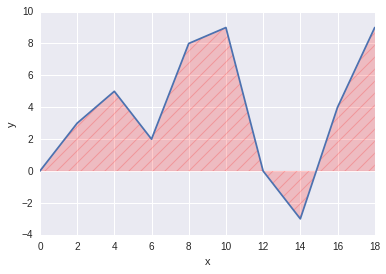

In [12]:
x = np.arange(0, 20, 2)
y = np.array([0, 3, 5, 2, 8, 9, 0, -3, 4, 9], dtype = float)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
#Show the integration area as a filled region
plt.fill_between(x, y, y2=0,color='red',hatch='//',alpha=0.2);

In [13]:
I = integrate.simps(y,x)  
print(I)

64.6666666667


## Multiple Integrals

Multiple integration can be handled using repeated calls to `quad`. The mechanics of this for double and triple integration have been wrapped up into the functions `dblquad` and `tplquad`. The function `dblquad` performs double integration. Use the help function to be sure that you define the arguments in the correct order.  The limits on all inner integrals are actually functions (which can be constant).

### Double integrals using `dblquad`

Suppose we want to integrate $f(x,y)=y\sin(x)+x\cos(y)$ over $\pi \le x \le 2\pi$ and $0 \le y \le \pi$:


$$\int_{x=\pi}^{2\pi}\int_{y=0}^{\pi} y \sin(x) + x \cos(y) dxdy$$



To use `dblquad` we have to provide *callable functions* for the range of the x-variable. Although here they are constants, the use of functions for the limits enables freedom to integrate over non-constant limits.  In this case we create trivial lambda functions that return the constants. Note the order of the arguments in the integrand.  If you put them in the wrong order you will get the wrong answer.

In [21]:
from scipy.integrate import dblquad

#NOTE: the order of arguments matters - inner to outer
integrand = lambda x,y: y * np.sin(x) + x * np.cos(y)

ymin = 0
ymax = np.pi

#The callable functions for the x limits are just constants in this case:
xmin = lambda y : np.pi
xmax = lambda y : 2*np.pi

#See the help for correct order of limits
I, err = dblquad(integrand, 0, np.pi, xmin, xmax)
print(I, err)

-9.869604401089354 3.8998131697641544e-13


In [15]:
dblquad?

### Triple integrals using `tplquad`

We can also numerically evaluate a triple integral:

$$ \int_{x=0}^{\pi}\int_{y=0}^{1}\int_{z=-1}^{1} y\sin(x)+z\cos(x) dxdydz$$

In [16]:
from scipy.integrate import tplquad

#AGAIN: the order of arguments matters - inner to outer
integrand = lambda x,y,z: y * np.sin(x) + z * np.cos(x)

zmin = -1
zmax = 1

ymin = lambda z: 0
ymax = lambda z: 1

#Note the order of these arguments:
xmin = lambda y,z: 0
xmax = lambda y,z: np.pi

#Here the order of limits is outer to inner
I, err = tplquad(integrand, zmin, zmax, ymin, ymax, xmin, xmax)
print(I, err)

1.9999999999999998 2.2204460492503128e-14
